In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### Load dataset

In [2]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#statistical information of train data.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#information of columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#lets see if we have any null values.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### most of the values in cabin column are missing, so we can drop this column.

In [7]:
train = train.drop(columns=['Cabin'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Exploaratory Data Analysis 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

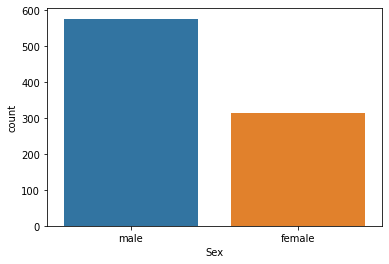

In [8]:
#visualize the frequency of categorical values.
import seaborn as sns
sns.countplot(train['Sex'])

#### out of 900 pople on ship, almost 600 were males and 300 were female.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

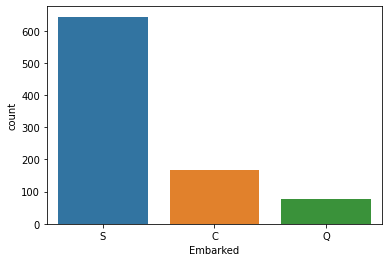

In [9]:
sns.countplot(train['Embarked'])

#### 650 people embarked from S, while 150 people from C and 50 from Q.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

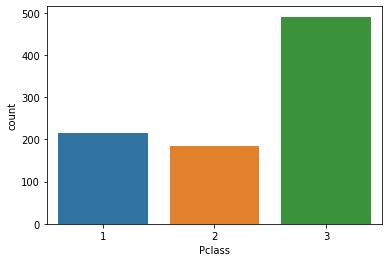

In [10]:
sns.countplot(train['Pclass'])

#### 200 people were from upper class, 180 people from middle class and 500 people from lower class.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='count'>

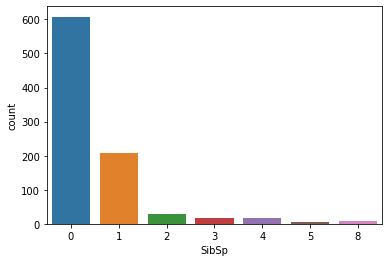

In [11]:
sns.countplot(train['SibSp'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch', ylabel='count'>

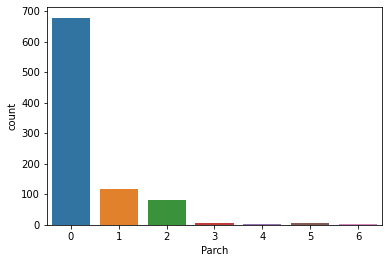

In [12]:
sns.countplot(train['Parch'])

<AxesSubplot:xlabel='Survived', ylabel='Count'>

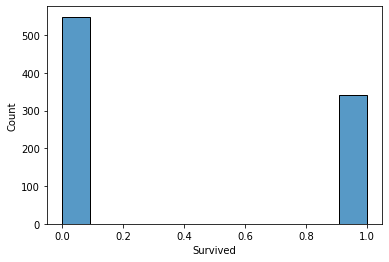

In [13]:
sns.histplot(train['Survived'])

#### Approx 350 people survived, while 550 people could not survive.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

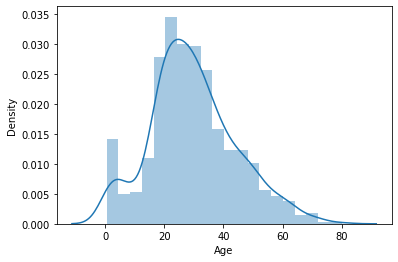

In [14]:
#distribution plot for numerical variables.
sns.distplot(train['Age'])

#### above graph can be called as a bell curve, because it shows uniform distribution. As expectation, number of people of lower age should be less, and mid age should be most and again for old age it should be less, here we can see this.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

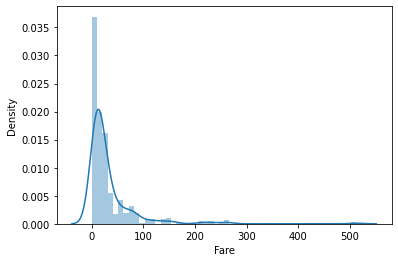

In [15]:
sns.distplot(train['Fare'])

#### It can be observed from the above graph that, the graph is not uniformly distributed, it is because majoiry of the people have taken lower class ticket, that's why fare for so may people is low, while for some having upper class ticket, the fare is high.
#### In order to uniformly distribute it, we need to apply log transformation on this data.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

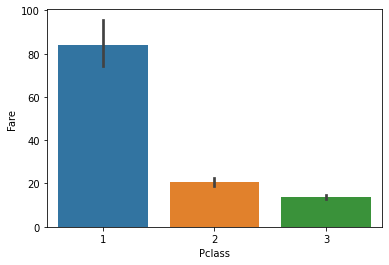

In [16]:
sns.barplot(train['Pclass'],train['Fare'])

#### As it should be, for class 1, the fare is high, and for lower class, it is comparatively lower.

In [17]:
#combine train and test data into one.
df = pd.concat([train,test],axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN


In [18]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C105
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,NaN
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,C,NaN


In [19]:
len(df)

1309

#### number of rows are 1309, but on retrieving last 5 rows of combined dataset, we are getting index number from 413 to 417, it means we need to reset the index.

In [20]:
df = df.reset_index()
df.tail()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,NaN
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C105
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,NaN
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,NaN
1308,417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,C,NaN


In [21]:
#lets see if we have any column with missing values, and then fill those values.
df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Embarked          2
Cabin          1218
dtype: int64

#### test data does not have survived column, so thats why we are getting 418 missing values for survived.

#### Missing values in Age can be replaced with mean value of Age.

In [22]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [23]:
#fill the missing values of fare with mean value too.
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
#fill the missing values of embarked with the most freuqent value i.e mode
df['Embarked']  = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
Cabin          1218
dtype: int64

In [24]:
# most of the values of cabin are missing, so we can drop the entire column.
# Name and Ticket are also strings with no importance as a factor for the model, so we can drop them too.
df = df.drop(columns=['Name','Ticket','Cabin','PassengerId'])
df.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.0,3,male,22.0,1,0,7.2500,S
1,1,1.0,1,female,38.0,1,0,71.2833,C
2,2,1.0,3,female,26.0,0,0,7.9250,S
3,3,1.0,1,female,35.0,1,0,53.1000,S
4,4,0.0,3,male,35.0,0,0,8.0500,S


In [25]:
# fare data was not normally distributed, so after applying log transformation on the data.
df['Fare'] = np.log(df['Fare']+1) # in case, fare is 0, and to avoid log throwing any error, we add 1.
df.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.0,3,male,22.0,1,0,2.110213,S
1,1,1.0,1,female,38.0,1,0,4.280593,C
2,2,1.0,3,female,26.0,0,0,2.188856,S
3,3,1.0,1,female,35.0,1,0,3.990834,S
4,4,0.0,3,male,35.0,0,0,2.202765,S


<AxesSubplot:>

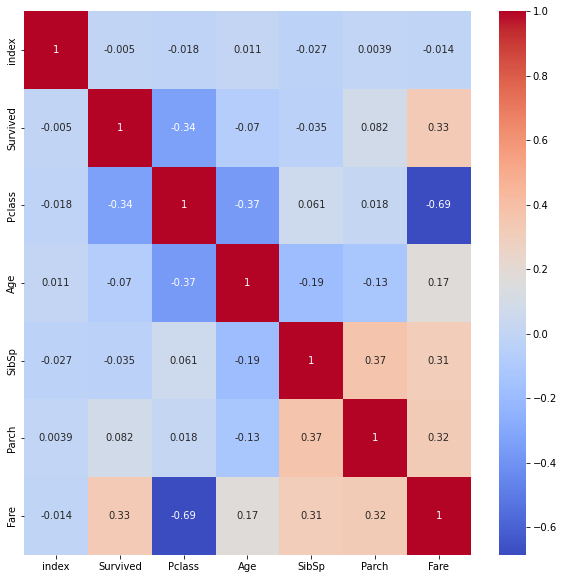

In [26]:
import matplotlib.pyplot as plt
cm = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap='coolwarm')

### denser the color, higher will be the relationship here.
#### survival has some good relationship with Pclass, and also with fare.
#### Pclass has relations with fare, survived and age also.

## Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.0,3,1,22.0,1,0,2.110213,2
1,1,1.0,1,0,38.0,1,0,4.280593,0
2,2,1.0,3,0,26.0,0,0,2.188856,2
3,3,1.0,1,0,35.0,1,0,3.990834,2
4,4,0.0,3,1,35.0,0,0,2.202765,2


## Train-Test Split

In [28]:
train_len = len(train)
train = df.iloc[:train_len,:]
test = df.iloc[train_len:,:]
train.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.0,3,1,22.0,1,0,2.110213,2
1,1,1.0,1,0,38.0,1,0,4.280593,0
2,2,1.0,3,0,26.0,0,0,2.188856,2
3,3,1.0,1,0,35.0,1,0,3.990834,2
4,4,0.0,3,1,35.0,0,0,2.202765,2


In [29]:
test.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,0,NaN,3,1,34.5,0,0,2.178064,1
892,1,NaN,3,0,47.0,1,0,2.079442,2
893,2,NaN,2,1,62.0,0,0,2.369075,1
894,3,NaN,3,1,27.0,0,0,2.268252,2
895,4,NaN,3,0,22.0,1,1,2.586824,2


## Train Model

In [30]:
from sklearn.model_selection import train_test_split,cross_val_score
def classify(model,data):
    X = data.drop(columns=['Survived'])
    Y = data['Survived']
    x_train, x_test , y_train, y_test = train_test_split(X,Y,test_size=0.25)
    model.fit(x_train,y_train)
    print("Accuracy is: ",model.score(x_test,y_test))
    #cross validation
    cv_score = cross_val_score(model,X,Y,cv=5)
    print("Cross validation score: ",np.mean(cv_score))

In [31]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,train)

Accuracy is:  0.7354260089686099
Cross validation score:  0.7890088506685078


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [32]:
#svm
from sklearn.svm import SVC
model = SVC()
classify(model,train)

Accuracy is:  0.5650224215246636
Cross validation score:  0.6161634548992531


In [33]:
#k nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model,train)

Accuracy is:  0.5650224215246636
Cross validation score:  0.5038039043374554


In [34]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,train)

Accuracy is:  0.7399103139013453
Cross validation score:  0.74988387420752


In [35]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,train)

Accuracy is:  0.8161434977578476
Cross validation score:  0.8048019584457974


In [36]:
#extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model,train)

Accuracy is:  0.7757847533632287
Cross validation score:  0.8093026175381333


In [37]:
from xgboost import XGBClassifier
model  = XGBClassifier()
classify(model,train)

Accuracy is:  0.8565022421524664
Cross validation score:  0.7801519050907036


## Training with Complete Data.

In [38]:
X = train.drop(columns=['Survived'])
Y = train['Survived']
model = RandomForestClassifier()
model.fit(X,Y)

RandomForestClassifier()

In [39]:
#predict on test data.
test.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,0,NaN,3,1,34.5,0,0,2.178064,1
892,1,NaN,3,0,47.0,1,0,2.079442,2
893,2,NaN,2,1,62.0,0,0,2.369075,1
894,3,NaN,3,1,27.0,0,0,2.268252,2
895,4,NaN,3,0,22.0,1,1,2.586824,2


In [40]:
X_test = test.drop(columns=['Survived'])
pred = model.predict(X_test).astype(int)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [41]:
sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [42]:
#update sub['Survived'] with the predicted value.
sub['Survived'] = pred
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [43]:
sub.to_csv("submission.csv",index=False)